In [1]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# ================================
# Step 1: Setup
# ================================
DATASET_PATH = r"D:\\"
MACHINE_TYPES = ["fan", "pump", "gearbox"]
X_all = []
y_all = []

# ================================
# Step 2: Feature Extraction
# ================================
def extract_advanced_features(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)
    
    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc.T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    
    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    
    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    
    # RMS Energy
    rms = np.mean(librosa.feature.rms(y=y))
    
    # Chroma STFT
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    
    return np.hstack((mfcc_scaled, spectral_centroid, spectral_bandwidth, zcr, rms, chroma_stft))

# ================================
# Step 3: Load Data from All 3 Machines
# ================================
for machine in MACHINE_TYPES:
    for test_type in ["source_test", "target_test"]:
        folder = os.path.join(DATASET_PATH, machine, test_type)
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(".wav"):
                    path = os.path.join(root, file)
                    label = 1 if "anomaly" in file else 0
                    features = extract_advanced_features(path)
                    X_all.append(features)
                    y_all.append(label)

print("✅ All Features Extracted")
print("Total Samples:", len(X_all))

# ================================
# Step 4: Prepare Dataset
# ================================
X = np.array(X_all)
y = np.array(y_all)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

# ================================
# Step 5: Train XGBoost Classifier
# ================================
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)
print("✅ XGBoost Training Complete!")

# ================================
# Step 6: Evaluate
# ================================
y_pred = xgb_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ All Features Extracted
Total Samples: 3807
Train Shape: (2664, 45)
Test Shape: (1143, 45)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Training Complete!

Confusion Matrix:
[[447 129]
 [149 418]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       576
           1       0.76      0.74      0.75       567

    accuracy                           0.76      1143
   macro avg       0.76      0.76      0.76      1143
weighted avg       0.76      0.76      0.76      1143



In [8]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
import xgboost as xgb


# ================================
# Step 1: Setup
# ================================
DATASET_PATH = r"D:\\"
MACHINE_TYPES = ["fan", "pump", "gearbox"]
X_all = []
y_all = []

# ================================
# Step 2: Advanced Feature Extraction
# ================================
def extract_advanced_features(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)

    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc.T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))

    # RMS Energy
    rms = np.mean(librosa.feature.rms(y=y))

    # Chroma STFT
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

    # Combine all features
    return np.hstack((mfcc_scaled, spectral_centroid, spectral_bandwidth, zcr, rms, chroma_stft))

# ================================
# Step 3: Load Data
# ================================
for machine in MACHINE_TYPES:
    for test_type in ["source_test", "target_test"]:
        folder = os.path.join(DATASET_PATH, machine, test_type)
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(".wav"):
                    path = os.path.join(root, file)
                    label = 1 if "anomaly" in file else 0
                    features = extract_advanced_features(path)
                    X_all.append(features)
                    y_all.append(label)

print("✅ All Features Extracted")
print("Total Samples:", len(X_all))

# ================================
# Step 4: Prepare Dataset
# ================================
X = np.array(X_all)
y = np.array(y_all)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
# ================================
# Step 5: Train Tuned XGBoost Model (No early stopping)
# ================================
xgb_model_tuned = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    verbosity=1
)

xgb_model_tuned.fit(X_train, y_train)

# ================================
# Step 6: Evaluate
# ================================
y_pred = xgb_model_tuned.predict(X_test)

print("\n🔥 Confusion Matrix (Final Tuned):")
print(confusion_matrix(y_test, y_pred))

print("\n🔥 Classification Report (Final Tuned):")
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [9]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
import xgboost as xgb


# ================================
# Step 1: Setup
# ================================
DATASET_PATH = r"D:\\"
MACHINE_TYPES = ["fan", "pump", "gearbox"]
X_all = []
y_all = []

# ================================
# Step 2: Advanced Feature Extraction
# ================================
def extract_advanced_features(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)

    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc.T, axis=0)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Spectral Bandwidth
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))

    # RMS Energy
    rms = np.mean(librosa.feature.rms(y=y))

    # Chroma STFT
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

    # Combine all features
    return np.hstack((mfcc_scaled, spectral_centroid, spectral_bandwidth, zcr, rms, chroma_stft))

# ================================
# Step 3: Load Data
# ================================
for machine in MACHINE_TYPES:
    for test_type in ["source_test", "target_test"]:
        folder = os.path.join(DATASET_PATH, machine, test_type)
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(".wav"):
                    path = os.path.join(root, file)
                    label = 1 if "anomaly" in file else 0
                    features = extract_advanced_features(path)
                    X_all.append(features)
                    y_all.append(label)

print("✅ All Features Extracted")
print("Total Samples:", len(X_all))

# ================================
# Step 4: Prepare Dataset
# ================================
X = np.array(X_all)
y = np.array(y_all)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
# ================================
# Step 5: Train XGBoost (Safe for all versions)
# ================================
xgb_model_tuned = XGBClassifier(
    n_estimators=300,             # Use 300 trees (safe and fast)
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    verbosity=1
)

# 🚀 Train without early stopping (safe for all versions)
xgb_model_tuned.fit(X_train, y_train)

# ================================
# Step 6: Evaluate
# ================================
y_pred = xgb_model_tuned.predict(X_test)

print("\n🔥 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🔥 Classification Report:")
print(classification_report(y_test, y_pred))



✅ All Features Extracted
Total Samples: 3807
Train Shape: (2664, 45)
Test Shape: (1143, 45)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔥 Confusion Matrix:
[[445 131]
 [147 420]]

🔥 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       576
           1       0.76      0.74      0.75       567

    accuracy                           0.76      1143
   macro avg       0.76      0.76      0.76      1143
weighted avg       0.76      0.76      0.76      1143



✅ All Features Extracted
Total Samples: 3807
Train Shape: (2664, 94)
Test Shape: (1143, 94)
Fitting 3 folds for each of 32 candidates, totalling 96 fits
🏆 Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500, 'subsample': 1.0}

🎯 Accuracy: 73.84%

🔥 Confusion Matrix:
[[436 140]
 [159 408]]

🔥 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       576
           1       0.74      0.72      0.73       567

    accuracy                           0.74      1143
   macro avg       0.74      0.74      0.74      1143
weighted avg       0.74      0.74      0.74      1143



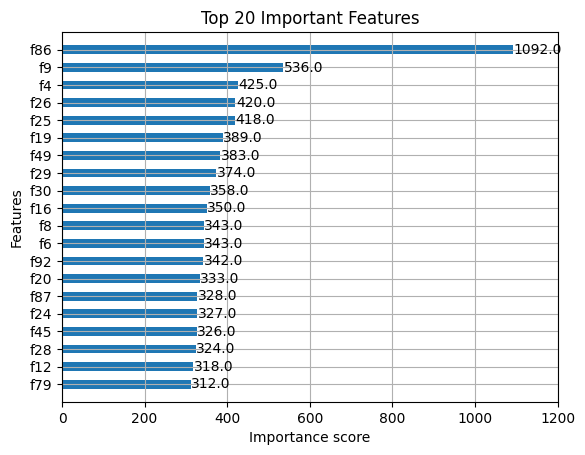

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import class_weight
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance

# =========================
# Step 1: Setup
# =========================
DATASET_PATH = r"D:\\"  # <-- Change this to your dataset location
MACHINE_TYPES = ["fan", "pump", "gearbox"]
X_all = []
y_all = []

# =========================
# Step 2: Advanced Feature Extraction
# =========================
def extract_advanced_features(file_path, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=None)
    
    # Feature blocks
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

    features = np.hstack([
        np.mean(mfcc, axis=1), np.std(mfcc, axis=1),
        np.mean(spectral_centroid), np.std(spectral_centroid),
        np.mean(spectral_bandwidth), np.std(spectral_bandwidth),
        np.mean(zcr), np.std(zcr),
        np.mean(rms), np.std(rms),
        np.mean(chroma_stft), np.std(chroma_stft),
        np.mean(rolloff), np.std(rolloff),
        np.mean(tonnetz), np.std(tonnetz)
    ])
    
    return features

# =========================
# Step 3: Load Data
# =========================
for machine in MACHINE_TYPES:
    for test_type in ["source_test", "target_test"]:
        folder = os.path.join(DATASET_PATH, machine, test_type)
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(".wav"):
                    path = os.path.join(root, file)
                    label = 1 if "anomaly" in file else 0
                    features = extract_advanced_features(path)
                    X_all.append(features)
                    y_all.append(label)

print("✅ All Features Extracted")
print("Total Samples:", len(X_all))

# =========================
# Step 4: Prepare Dataset
# =========================
X = np.array(X_all)
y = np.array(y_all)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

# =========================
# Step 5: Class Weight Handling
# =========================
sample_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

# =========================
# Step 6: Model Training with Hyperparameter Tuning
# =========================
params = {
    'max_depth': [6, 8],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [300, 500],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42, verbosity=0),
    param_grid=params,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train, sample_weight=sample_weights)
best_model = grid.best_estimator_

print("🏆 Best Params:", grid.best_params_)

# =========================
# Step 7: Evaluation
# =========================
y_pred = best_model.predict(X_test)

print("\n🎯 Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\n🔥 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🔥 Classification Report:")
print(classification_report(y_test, y_pred))

# =========================
# Step 8: Feature Importance Plot
# =========================
plot_importance(best_model, max_num_features=20, height=0.5)
plt.title("Top 20 Important Features")
plt.show()

# =========================
# Step 9: Optional Ensemble Model (for extra boost)
# =========================
# ensemble = VotingClassifier(estimators=[
#     ('xgb', best_model),
#     ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
#     ('svc', SVC(probability=True, kernel='rbf'))
# ], voting='soft')

# ensemble.fit(X_train, y_train)
# y_ensemble = ensemble.predict(X_test)

# print("\n🤖 Ensemble Accuracy: {:.2f}%".format(accuracy_score(y_test, y_ensemble) * 100))
# print("\n🔥 Ensemble Confusion Matrix:")
# print(confusion_matrix(y_test, y_ensemble))
